# Data Preprocessing

In this setion, I am going to analyze and visualize my dataset to further validate my Exploratory Data Analysis Process and post that i will do feature engineering to obtain certain features that will help the model to predict the target score well. 

I extract 700000 comments out of reddit may 2015 dataset.
I am going to predict the score of only AskReddit Comments, and thus the I got 54572 comments after scraping the dataset.
Hereby, i have mentioned all the features that i am going to obtain in this section:

**Original Feaures:**

   - created_utc: the time in seconds from an origin when the comment was posted
   - ups: number of upvotes on the comment
   - subreddit_id: id of the specific subreddit
   - link_id: id of the particular comment thread
   - name: name of the comment
   - score_hidden: 1 if the score of the comment was hidden; 0 else
   - author_flair_css_class: CSS class for the comment flair
   - author_flair_text: flair text for the comment
   - id: id of the comment (basically the same as comment name)
   - removal_reason: reason a comment was removed (either legal or None)
   - gilded: the number of gilded tags (~ premium likes) on the comment
   - downs: number of downvotes on the comment
   - archived: if the thread was archived (no new comments, no new likes)
   - author: author's reddit username
   - score: number of upvotes
   - retrieved_on: The time (in seconds) when the comment was pulled to create the dataset.
   - body: the comment itself
   - distinguished: the type of user on the page. Either moderator, admin, or None.
   - edited: whether (1) or not (0) the comment has been edited
   - controversiality: a Boolean indicating whether (1) or not (0) a comment is controversial i.e popular comments that are getting closely the same amount of upvotes as downvotes.
   - parent_id: the id of the comment that this comment was replying to. None if the comment is not a reply


**Engineered Features:**

   - time: timestamp of comment
   - time_lapse: (in seconds) the amount of time since the first comment in a thread
   - hour_of_comment: hour of day comment was posted
   - weekday: day of week comment was posted
   - flair: Whether or not there is flair text for the comment
   - flair_css: Whether or not there is a CSS class for the comment flair
   - depth: depth of comment in its thread
   - parent_score: score of parent comment. If no score for a parent_id then the value is missing
   - time_since_parent: time since parent comment in seconds
   - comment_tree_root_id: id of comment tree root.
   - comment_tree_root_score: score of comment tree root
   - time_since_comment_tree_root: time since comment tree root in seconds
   - parent_cosine: consine similarity between comment and its parent comment's embeddings
   - parent_euc: euclidean similarity between comment and its parent comment's embeddings
   - senti_neg: negative sentiment score
   - senti_neu: neutral sentiment score
   - senti_pos: positive sentiment score
   - senti_comp: compound sentiment score
   
**Scraped Features:**
   - trophies: No of trophies the redditor has.
   - sticked: Wether the redditer's comment is sticked by the submitter or not.
   - is_submitter: Whether the redditor who commented is also the author of the post. 	
   - comment_karma: It is the score a redditor gets for posting and commenting on reddit.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re
import warnings
from IPython.display import display # Allows the use of display() for DataFrames
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('reddit-data.csv')

In [3]:
data.shape

(699998, 22)

In [4]:
data.columns

Index(['Unnamed: 0', 'score_hidden', 'name', 'link_id', 'body', 'downs',
       'created_utc', 'score', 'author', 'distinguished', 'id', 'archived',
       'parent_id', 'subreddit', 'author_flair_css_class', 'author_flair_text',
       'gilded', 'retrieved_on', 'ups', 'controversiality', 'subreddit_id',
       'edited'],
      dtype='object')

In [5]:
data = data.drop('Unnamed: 0' , axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699998 entries, 0 to 699997
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   score_hidden            699998 non-null  bool  
 1   name                    699998 non-null  object
 2   link_id                 699998 non-null  object
 3   body                    699980 non-null  object
 4   downs                   699998 non-null  int64 
 5   created_utc             699998 non-null  int64 
 6   score                   699998 non-null  int64 
 7   author                  699998 non-null  object
 8   distinguished           5163 non-null    object
 9   id                      699998 non-null  object
 10  archived                699998 non-null  bool  
 11  parent_id               699998 non-null  object
 12  subreddit               699998 non-null  object
 13  author_flair_css_class  201972 non-null  object
 14  author_flair_text       188553 non-n

In [7]:
data.describe()

downs   created_utc          score         gilded  retrieved_on  \
count  699998.0  6.999980e+05  699998.000000  699998.000000  6.999980e+05   
mean        0.0  1.420131e+09       4.716678       0.000626  1.425113e+09   
std         0.0  7.996809e+04      39.873964       0.025738  1.425735e+04   
min         0.0  1.420070e+09    -353.000000       0.000000  1.425082e+09   
25%         0.0  1.420080e+09       1.000000       0.000000  1.425103e+09   
50%         0.0  1.420091e+09       1.000000       0.000000  1.425121e+09   
75%         0.0  1.420187e+09       3.000000       0.000000  1.425123e+09   
max         0.0  1.420307e+09    5205.000000       2.000000  1.425124e+09   

                 ups  controversiality  
count  699998.000000          699998.0  
mean        4.716678               0.0  
std        39.873964               0.0  
min      -353.000000               0.0  
25%         1.000000               0.0  
50%         1.000000               0.0  
75%         3.000000               0.0  
max      5205.000000               0.0

In [8]:
import pandas_profiling
data.profile_report(title="Reddit Data")

In [9]:
data.isnull().sum()

score_hidden                   0
name                           0
link_id                        0
body                          18
downs                          0
created_utc                    0
score                          0
author                         0
distinguished             694835
id                             0
archived                       0
parent_id                      0
subreddit                      0
author_flair_css_class    498026
author_flair_text         511445
gilded                         0
retrieved_on                   0
ups                            0
controversiality               0
subreddit_id                   0
edited                         0
dtype: int64

In [10]:
data.dropna(subset=['body'] , inplace = True)

In [11]:
data.shape

(699980, 21)

In [12]:
data.corr()

score_hidden  downs  created_utc     score  archived  \
score_hidden          1.000000    NaN    -0.019620 -0.004972       NaN   
downs                      NaN    NaN          NaN       NaN       NaN   
created_utc          -0.019620    NaN     1.000000  0.021340       NaN   
score                -0.004972    NaN     0.021340  1.000000       NaN   
archived                   NaN    NaN          NaN       NaN       NaN   
gilded               -0.001297    NaN    -0.005673  0.154898       NaN   
retrieved_on          0.019473    NaN    -0.999909 -0.021362       NaN   
ups                  -0.004972    NaN     0.021340  1.000000       NaN   
controversiality           NaN    NaN          NaN       NaN       NaN   

                    gilded  retrieved_on       ups  controversiality  
score_hidden     -0.001297      0.019473 -0.004972               NaN  
downs                  NaN           NaN       NaN               NaN  
created_utc      -0.005673     -0.999909  0.021340               NaN  
score             0.154898     -0.021362  1.000000               NaN  
archived               NaN           NaN       NaN               NaN  
gilded            1.000000      0.005649  0.154898               NaN  
retrieved_on      0.005649      1.000000 -0.021362               NaN  
ups               0.154898     -0.021362  1.000000               NaN  
controversiality       NaN           NaN       NaN               NaN

In [13]:
df = data.drop(labels = ['downs' , 'archived' , 'controversiality'] , axis = 1)

<AxesSubplot:>

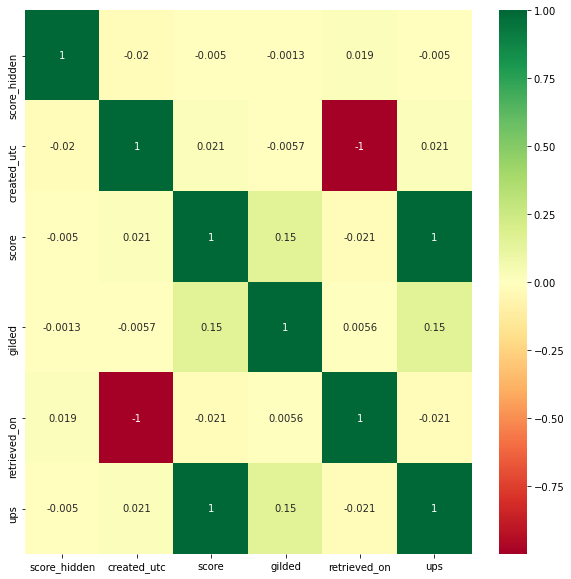

In [14]:
plt.figure(figsize = (10,10))
sn.heatmap(df.corr() , annot = True , cmap="RdYlGn")

<AxesSubplot:>

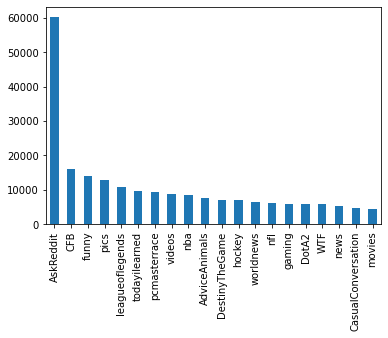

In [15]:
data.subreddit.value_counts()[:20].plot(kind='bar')

In [16]:
data = data[data.author != "[deleted]"]
data = data[data.subreddit == 'AskReddit']

In [17]:
data.shape

(54572, 21)

Loading Scraped Data

In [21]:
data = pd.read_csv('final-data.csv')

In [22]:
data.shape

(54572, 26)

In [23]:
col = ['subreddit_id' , 'subreddit' , 'archived', 'retrieved_on', 'distinguished' ,'Unnamed: 0']
data.drop(labels = col, axis = 1, inplace = True)

In [24]:
data.head().T


0  \
score_hidden                                                        False   
name                                                           t1_cnas90l   
link_id                                                         t3_2qy8r4   
body                    Roofers, the only people on a job site more sa...   
downs                                                                   0   
created_utc                                                    1420070401   
score                                                                   2   
author                                                           Movepeck   
id                                                                cnas90l   
parent_id                                                      t1_cnaqrf6   
author_flair_css_class                                                NaN   
author_flair_text                                                     NaN   
gilded                                                                  0   
ups                                                                     2   
controversiality                                                        0   
edited                                                              False   
trophies                                                                2   
sticked                                                                 0   
is_submitter                                                            0   
comment_karma                                                       13581   

                                                                  1  \
score_hidden                                                  False   
name                                                     t1_cnas91a   
link_id                                                   t3_2qxfa5   
body                    Have You Tried Turning It Off And On Again?   
downs                                                             0   
created_utc                                              1420070403   
score                                                             1   
author                                         A_french_chinese_man   
id                                                          cnas91a   
parent_id                                                 t3_2qxfa5   
author_flair_css_class                                          NaN   
author_flair_text                                               NaN   
gilded                                                            0   
ups                                                               1   
controversiality                                                  0   
edited                                                        False   
trophies                                                          4   
sticked                                                           0   
is_submitter                                                      0   
comment_karma                                                128671   

                                                                        2  \
score_hidden                                                        False   
name                                                           t1_cnas91b   
link_id                                                         t3_2qykcw   
body                    My Great to the power of 6 ..or 7 grandfather ...   
downs                                                                   0   
created_utc                                                    1420070403   
score                                                                   1   
author                                                       TomHanksDied   
id                                                                cnas91b   
parent_id                                                       t3_2qykcw   
author_flair_css_class                                                NaN   
author_flair_text                     

**_Time Based Features:_**

   - time: timestamp of comment
   - time_lapse: (in seconds) the amount of time since the first comment in a thread
   - hour_of_comment: hour of day comment was posted
   - weekday: day of week comment was posted



In [25]:
data['time'] = pd.to_datetime(data.created_utc, unit='s')
first_comment = data[['link_id', 'time']].groupby(by=['link_id']).min()
first_comment_dict = first_comment.to_dict('index')

def time_lapse(x):
    return first_comment_dict[x]['time']

data['time_lapse'] = data.time - data.link_id.apply(time_lapse)
data.time_lapse = data.time_lapse.apply(lambda x: x.total_seconds())
data['hour_of_comment'] = data.time.apply(lambda x: x.hour)
data['weekday'] = data.time.dt.weekday

In [26]:
df = pd.get_dummies(data , prefix = 'hour_of_comment' , columns = ['hour_of_comment'])
data = pd.get_dummies(df , prefix = 'weekday' , columns = ['weekday'])

In [27]:
data.head().T

0  \
score_hidden                                                        False   
name                                                           t1_cnas90l   
link_id                                                         t3_2qy8r4   
body                    Roofers, the only people on a job site more sa...   
downs                                                                   0   
created_utc                                                    1420070401   
score                                                                   2   
author                                                           Movepeck   
id                                                                cnas90l   
parent_id                                                      t1_cnaqrf6   
author_flair_css_class                                                NaN   
author_flair_text                                                     NaN   
gilded                                                                  0   
ups                                                                     2   
controversiality                                                        0   
edited                                                              False   
trophies                                                                2   
sticked                                                                 0   
is_submitter                                                            0   
comment_karma                                                       13581   
time                                                  2015-01-01 00:00:01   
time_lapse                                                              0   
hour_of_comment_0                                                       1   
hour_of_comment_1                                                       0   
hour_of_comment_2                                                       0   
hour_of_comment_3                                                       0   
hour_of_comment_4                                                       0   
hour_of_comment_5                                                       0   
hour_of_comment_6                                                       0   
hour_of_comment_7                                                       0   
hour_of_comment_8                                                       0   
hour_of_comment_9                                                       0   
hour_of_comment_10                                                      0   
hour_of_comment_16                                                      0   
hour_of_comment_17                                                      0   
weekday_3                                                               1   
weekday_4                                                               0   
weekday_5                                                               0   

                                                                  1  \
score_hidden                                                  False   
name                                                     t1_cnas91a   
link_id                                                   t3_2qxfa5   
body                    Have You Tried Turning It Off And On Again?   
downs                                                             0   
created_utc                                              1420070403   
score                                                             1   
author                                         A_french_chinese_man   
id                                                          cnas91a   
parent_id                                                 t3_2qxfa5   
author_flair_css_class                                          NaN   
author_flair_text                                               NaN   
gilded                                                            0   
ups                                                               1   
con

**___Comment Appearance Based Features___**



   - flair: Whether or not there is flair text for the comment
   - flair_css: Whether or not there is a CSS class for the comment flair



In [28]:
data['author_flair_css_class'].fillna(0 , inplace = True)
data['author_flair_text'].fillna(0 , inplace= True)

In [29]:
data['flair'] = None
data['flair_css'] = None
data['flair'].loc[data['author_flair_text'].isin([i for i in data['author_flair_text'] if i == 0 ])]= 0
data['flair'].loc[data['author_flair_text'].isin([i for i in data['author_flair_text'] if i != 0])]= 1
data['flair_css'].loc[data['author_flair_css_class'].isin([i for i in data['author_flair_css_class'] if i == 0])]= 0
data['flair_css'].loc[data['author_flair_css_class'].isin([i for i in data['author_flair_css_class'] if i != 0])]= 1

In [30]:
data.head(10).T

0  \
score_hidden                                                        False   
name                                                           t1_cnas90l   
link_id                                                         t3_2qy8r4   
body                    Roofers, the only people on a job site more sa...   
downs                                                                   0   
created_utc                                                    1420070401   
score                                                                   2   
author                                                           Movepeck   
id                                                                cnas90l   
parent_id                                                      t1_cnaqrf6   
author_flair_css_class                                                  0   
author_flair_text                                                       0   
gilded                                                                  0   
ups                                                                     2   
controversiality                                                        0   
edited                                                              False   
trophies                                                                2   
sticked                                                                 0   
is_submitter                                                            0   
comment_karma                                                       13581   
time                                                  2015-01-01 00:00:01   
time_lapse                                                              0   
hour_of_comment_0                                                       1   
hour_of_comment_1                                                       0   
hour_of_comment_2                                                       0   
hour_of_comment_3                                                       0   
hour_of_comment_4                                                       0   
hour_of_comment_5                                                       0   
hour_of_comment_6                                                       0   
hour_of_comment_7                                                       0   
hour_of_comment_8                                                       0   
hour_of_comment_9                                                       0   
hour_of_comment_10                                                      0   
hour_of_comment_16                                                      0   
hour_of_comment_17                                                      0   
weekday_3                                                               1   
weekday_4                                                               0   
weekday_5                                                               0   
flair                                                                   0   
flair_css                                                               0   

                                                                  1  \
score_hidden                                                  False   
name                                                     t1_cnas91a   
link_id                                                   t3_2qxfa5   
body                    Have You Tried Turning It Off And On Again?   
downs                                                             0   
created_utc                                              1420070403   
score                                                             1   
author                                         A_french_chinese_man   
id                                                          cnas91a   
parent_id                                                 t3_2qxfa5   
author_flair_css_class                                            0   
author_flair_text                                             

In [32]:
data['flair'].value_counts()

0    54572
Name: flair, dtype: int64

In [33]:
data['flair_css'].value_counts()

0    54572
Name: flair_css, dtype: int64

In [36]:
data.drop(labels = ['author_flair_text' , 'author_flair_css_class'] , axis=1 , inplace = True)
data.drop(labels = ['flair' , 'flair_css'] , axis=1 , inplace = True)


**_Parent Based Features:_**

   - parent_score: score of parent comment. If no score for a parent_id then the value is missing
   - time_since_parent: time since parent comment in seconds



In [37]:
        
def parent_score(x):
    try:
        return parent_score_dict[x]
    except:
        return np.nan
    

def parent_time(x):
    try:
        return parent_time_dict[x].total_seconds()
    except:
        return np.nan
        

parent_score_dict = pd.Series(data['score'].values, index=data['name']).to_dict()
data['parent_score'] = data['parent_id'].apply(lambda x: parent_score(x))

parent_time_dict = pd.Series(data['time'].values, index=data['name']).to_dict()
data['time_since_parent'] = data['parent_id'].apply(lambda x: parent_time(x))


In [38]:
import time
from datetime import timedelta
def convert(x):
    hours, mins, secs = x.hour , x.minute , x.second
    seconds = hours * 60 * 60 + mins * 60 + secs
    return seconds
data['time_since_parent'].fillna(data['time'].loc[data['time_since_parent'].isna()] , inplace = True)
data['time_since_parent'] = data['time'] - data['time_since_parent']
data['time_since_parent'] = data.time.apply(lambda x: convert(x))

In [39]:
data.head().T

0  \
score_hidden                                                    False   
name                                                       t1_cnas90l   
link_id                                                     t3_2qy8r4   
body                Roofers, the only people on a job site more sa...   
downs                                                               0   
created_utc                                                1420070401   
score                                                               2   
author                                                       Movepeck   
id                                                            cnas90l   
parent_id                                                  t1_cnaqrf6   
gilded                                                              0   
ups                                                                 2   
controversiality                                                    0   
edited                                                          False   
trophies                                                            2   
sticked                                                             0   
is_submitter                                                        0   
comment_karma                                                   13581   
time                                              2015-01-01 00:00:01   
time_lapse                                                          0   
hour_of_comment_0                                                   1   
hour_of_comment_1                                                   0   
hour_of_comment_2                                                   0   
hour_of_comment_3                                                   0   
hour_of_comment_4                                                   0   
hour_of_comment_5                                                   0   
hour_of_comment_6                                                   0   
hour_of_comment_7                                                   0   
hour_of_comment_8                                                   0   
hour_of_comment_9                                                   0   
hour_of_comment_10                                                  0   
hour_of_comment_16                                                  0   
hour_of_comment_17                                                  0   
weekday_3                                                           1   
weekday_4                                                           0   
weekday_5                                                           0   
parent_score                                                      NaN   
time_since_parent                                                   1   

                                                              1  \
score_hidden                                              False   
name                                                 t1_cnas91a   
link_id                                               t3_2qxfa5   
body                Have You Tried Turning It Off And On Again?   
downs                                                         0   
created_utc                                          1420070403   
score                                                         1   
author                                     A_french_chinese_man   
id                                                      cnas91a   
parent_id                                             t3_2qxfa5   
gilded                                                        0   
ups                                                           1   
controversiality                                              0   
edited                                                    False   
trophies                                                      4   
sticked                                                       0   
is_submitter                                                  0   
comment_karma 


**_Comment Tree Based Features:_**

   - comment_tree_root_id: id of comment tree root.
   - comment_tree_root_score: score of comment tree root
   - time_since_comment_tree_root: time since comment tree root in seconds



In [40]:
parent_comment_dict = pd.Series(data['parent_id'].values, index=data['name']).to_dict()

def comment_tree_root(x):
    if parent_comment_dict[x][:3] == 't3_':
        return x
    try:
        return comment_tree_root(parent_comment_dict[x])
    except:
        return np.nan
    
def get_time(x):
    try:
        return parent_time_dict[x]
    except:
        return np.nan
    
data['comment_root_id'] = data.name.apply(comment_tree_root)
data['comment_root_score'] = data.comment_root_id.apply(lambda x: parent_score(x))
data['time_since_comment_root'] = data.time - data.comment_root_id.apply(get_time)
data['time_since_comment_root'] = data.time_since_comment_root.apply(lambda x: x.total_seconds())

In [41]:
data.head().T

0  \
score_hidden                                                         False   
name                                                            t1_cnas90l   
link_id                                                          t3_2qy8r4   
body                     Roofers, the only people on a job site more sa...   
downs                                                                    0   
created_utc                                                     1420070401   
score                                                                    2   
author                                                            Movepeck   
id                                                                 cnas90l   
parent_id                                                       t1_cnaqrf6   
gilded                                                                   0   
ups                                                                      2   
controversiality                                                         0   
edited                                                               False   
trophies                                                                 2   
sticked                                                                  0   
is_submitter                                                             0   
comment_karma                                                        13581   
time                                                   2015-01-01 00:00:01   
time_lapse                                                               0   
hour_of_comment_0                                                        1   
hour_of_comment_1                                                        0   
hour_of_comment_2                                                        0   
hour_of_comment_3                                                        0   
hour_of_comment_4                                                        0   
hour_of_comment_5                                                        0   
hour_of_comment_6                                                        0   
hour_of_comment_7                                                        0   
hour_of_comment_8                                                        0   
hour_of_comment_9                                                        0   
hour_of_comment_10                                                       0   
hour_of_comment_16                                                       0   
hour_of_comment_17                                                       0   
weekday_3                                                                1   
weekday_4                                                                0   
weekday_5                                                                0   
parent_score                                                           NaN   
time_since_parent                                                        1   
comment_root_id                                                        NaN   
comment_root_score                                                     NaN   
time_since_comment_root                                                NaN   

                                                                   1  \
score_hidden                                                   False   
name                                                      t1_cnas91a   
link_id                                                    t3_2qxfa5   
body                     Have You Tried Turning It Off And On Again?   
downs                                                              0   
created_utc                                               1420070403   
score                                                              1   
author                                          A_french_chinese_man   
id                                                           cnas91a   
parent_id                                                  t3_2qxfa5   
gild

**_Comment Content Based Features:_**



   - no_linked_urls: count of respective urls there were in a given comment (**no urls in the resultant dataset**)

   - is_edited: edited is a timestamp that indicates when the comment was last edited. Also useful would be a variable that indicates whether the comment was edited or not.

   - quoted: Check if the comment quotes another comment.

   - no_quoted: Check the number of quotes in a comment.

   - word_count: number of words in comment


In [42]:
data['is_edited'] = None
data['is_edited'].loc[data['edited'].isin([i for i in data['edited'] if i == 'False'])]= 0
data['is_edited'].loc[data['edited'].isin([i for i in data['edited'] if i != 'False'])]= 1

data['is_quoted'] = data.body.str.contains('&gt;')
data['no_quoted'] = data.body.str.count('&gt;')

data['word_count'] = data.body.apply(lambda x: len(x.split()))

In [44]:
data.head().T

0  \
score_hidden                                                         False   
name                                                            t1_cnas90l   
link_id                                                          t3_2qy8r4   
body                     Roofers, the only people on a job site more sa...   
downs                                                                    0   
created_utc                                                     1420070401   
score                                                                    2   
author                                                            Movepeck   
id                                                                 cnas90l   
parent_id                                                       t1_cnaqrf6   
gilded                                                                   0   
ups                                                                      2   
controversiality                                                         0   
edited                                                               False   
trophies                                                                 2   
sticked                                                                  0   
is_submitter                                                             0   
comment_karma                                                        13581   
time                                                   2015-01-01 00:00:01   
time_lapse                                                               0   
hour_of_comment_0                                                        1   
hour_of_comment_1                                                        0   
hour_of_comment_2                                                        0   
hour_of_comment_3                                                        0   
hour_of_comment_4                                                        0   
hour_of_comment_5                                                        0   
hour_of_comment_6                                                        0   
hour_of_comment_7                                                        0   
hour_of_comment_8                                                        0   
hour_of_comment_9                                                        0   
hour_of_comment_10                                                       0   
hour_of_comment_16                                                       0   
hour_of_comment_17                                                       0   
weekday_3                                                                1   
weekday_4                                                                0   
weekday_5                                                                0   
parent_score                                                           NaN   
time_since_parent                                                        1   
comment_root_id                                                        NaN   
comment_root_score                                                     NaN   
time_since_comment_root                                                NaN   
is_edited                                                                0   
is_quoted                                                            False   
no_quoted                                                                0   
word_count                                                              14   

                                                                   1  \
score_hidden                                                   False   
name                                                      t1_cnas91a   
link_id                                                    t3_2qxfa5   
body                     Have You Tried Turning It Off And On Again?   
downs                                                              0   
created_utc                                         

In [45]:
data.to_csv('final-data.csv')